# Lab 5

Authors: $\lambda$ Justin Ventura [[jventura3@gulls.salisbury.edu]] & Blaine Mason $\lambda$

Date: Thursday, October 15th, 2020.

## - Description -

A lot of stats :(

In [29]:
def normal_cdf(x, mu, sigma):
    return (1 + math.erf((x-mu)/(sigma*np.sqrt(2))))/2
def normal_pdf(x, mu, sigma):
    return np.exp(-1*(x-mu)**2/(2 * sigma**2))/(np.sqrt(2*np.pi*sigma))
# for the normal distribution
def inverse_normal_cdf(t, mu, sigma):
    # BINARY SEARCH!
    # - start our "low" value at somewhere like -10
    # - start out "high" value at ~ 10
    
    # make sure these center around mu
    high, low = 10*sigma + mu, -10*sigma + mu
    
    # the tolerance if we are "close enough" to t
    tol = 1e-5
    
    # for safety
    max_iters = 1000
    loop = 0
    
    while loop < max_iters:
        loop += 1
        mid = (high+low)/2
        if abs(normal_cdf(mid, mu, sigma) - t) < tol:
            return mid
        elif normal_cdf(mid, mu, sigma) > t:
            high = mid # mid is too high, bring the range down 
        else:
            low = mid
    
    print("Error! Took too long to converge!")
# Calculate the probability of lying inside the
# range [mu - t, mu + t]
def normal_center_probability(t, mu, sigma):
    # return the difference of two integrals
    return normal_cdf(mu + t, mu, sigma) - normal_cdf(mu - t, mu, sigma)

# Calculates the probability of lying oustide the range
# [mu - t, mu + t]
def normal_tail_probability(t, mu, sigma):
    # use the law of total probability, full integral must be 1
    return 1 - normal_center_probability(t, mu, sigma)
def normal_two_sided_limits(p, mu, sigma):
    # calculate the bounds around the mean
    # that have probability p
    tail_p = (1 - p)/2
    
    # how far to the right do we get probability tail_p
    high = inverse_normal_cdf(1 - tail_p, mu, sigma)
    
    # how far to the left
    low = inverse_normal_cdf(tail_p, mu, sigma)
    
    return low, high
def two_sided_p_value(x, mu, sigma):
    """
    Calculates that, assuming X comes from N(mu, sigma),
    what is the probability that we observe something as
    extreme as x. I.e. what is the probabily in the tails
    that are |mu-x| apart.
    """
    return normal_tail_probability(abs(mu-x), mu, sigma)

In [30]:
# Libraries:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the data set:
iris = pd.read_csv('iris.data', names=['sep_length', 'sep_width', 'pet_length', 'pet_width', 'class'])
print('iris dataset shape: ', iris.shape)
iris.head(10)

iris dataset shape:  (150, 5)


,sep_length,sep_width,pet_length,pet_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## For each of the four numerical categories, compute the mean with a 95% confidence interval and show them in a bar chart.

(5.6160103600724689, 6.0706563065941985, 5.8433333333333337, 'sepal_lens')
(2.9268728830186101, 3.1811271169813904, 3.0540000000000003, 'sepal_wids')
(3.2953591420110007, 4.2219741913223316, 3.7586666666666662, 'petal_lens')
(0.96520594663213932, 1.4321273867011941, 1.1986666666666668, 'petal_wids')


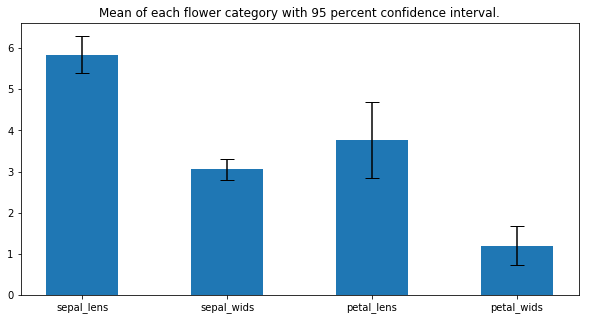

In [4]:
sepal_lens = iris[['sep_length']].values
sepal_wids = iris[['sep_width']].values
petal_lens = iris[['pet_length']].values
petal_wids = iris[['pet_width']].values

all_arrays = [sepal_lens, sepal_wids, petal_lens, petal_wids]
names = ['sepal_lens', 'sepal_wids', 'petal_lens', 'petal_wids']
mean_data = []


# 1) take 50 samples WITH replacement.
# 2) take the average of those, append to a list L.
# 3) repeat 50 times.
# 4) find the standard deviation of L, this is SE.
for name, array in zip(names, all_arrays):
    sample_size = 50
    resample_count = 50
    x_bar = array.mean()
    samples = []
    sample_means = []

    for i in range(resample_count):
        for i in range(sample_size):
            idx = np.random.randint(0, 150)
            samples.append(array[idx])
        sample_means.append(np.mean(samples))
        samples.clear()

    SE = np.std(sample_means)
    lo = (x_bar - 1.96 * SE)
    hi = (x_bar + 1.96 * SE)

    mean_data.append((lo, hi, x_bar, name))

# For information.
for data in mean_data:
    print(data)

# Plotting
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Mean of each flower category with 95 percent confidence interval.')
plt.bar(names, [data[2] for data in mean_data], yerr=[data[1] - data[0] for data in mean_data], capsize=7, width=0.5)
plt.show()
pass

## Next, compute the mean of sepal and petal measurements with 95% confidence intervals, but this time separated by each of the three classes (so you will have a total of 12 bars and intervals).

(4.955030035128126, 5.0569699648718727, 5.005999999999999, 'setosa')
(5.8702736275761396, 6.0017263724238603, 5.936, 'versicolor')
(6.5012866139754637, 6.6747133860245329, 6.587999999999998, 'virginica')
(3.3725547720190563, 3.4634452279809449, 3.4180000000000006, 'setosa')
(2.723171485739563, 2.8168285142604379, 2.7700000000000005, 'versicolor')
(2.9314505893700038, 3.0165494106299957, 2.9739999999999998, 'virginica')
(1.4417309495631268, 1.4862690504368732, 1.464, 'setosa')
(4.1935183601598149, 4.3264816398401846, 4.26, 'versicolor')
(5.4834244091426108, 5.6205755908573884, 5.552, 'virginica')
(0.22979379885261361, 0.25820620114738624, 0.2439999999999999, 'setosa')
(1.2998856202064839, 1.3521143797935158, 1.3259999999999998, 'versicolor')
(1.9928390010186663, 2.0591609989813335, 2.026, 'virginica')


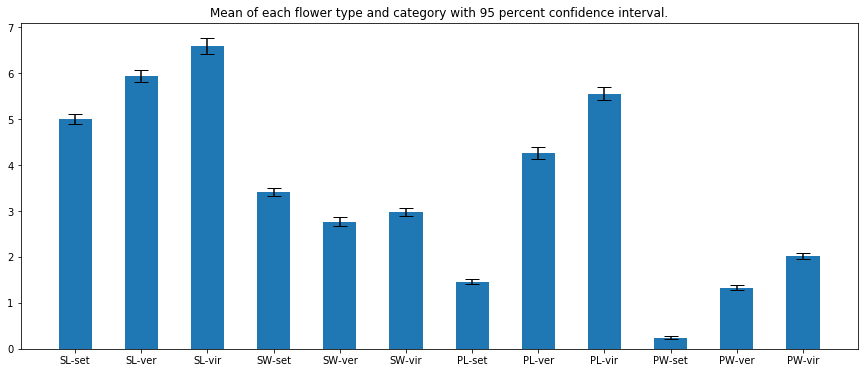

In [5]:
sepal_lens = iris[['sep_length', 'class']].values
sepal_wids = iris[['sep_width', 'class']].values
petal_lens = iris[['pet_length', 'class']].values
petal_wids = iris[['pet_width', 'class']].values
all_arrays = [sepal_lens, sepal_wids, petal_lens, petal_wids]

# This makes indexing easier; convert to numbers.
for array in all_arrays:
    for elem in array:
        if elem[1] == 'Iris-setosa':
            elem[1] = int(0)
        elif elem[1] == 'Iris-versicolor':
            elem[1] = int(1)
        else:
            elem[1] = int(2)

# Split arrays by len, wid, and flower (iris) type.
new_arrays = []
mean_data = []
for array in all_arrays:
    new_arrays.append(np.split(array, np.where(np.diff(sepal_lens[:,1]))[0]+1))

# Sampling happens here.
for group in new_arrays:
    f_names = ['setosa', 'versicolor', 'virginica']
    for f_class, f_name in zip(group, f_names):
        sample_size = 50
        resample_count = 50
        x_bar = f_class[:,0].mean()
        samples = []
        sample_means = []

        for i in range(resample_count):
            for i in range(sample_size):
                idx = np.random.randint(0, len(f_class))
                samples.append(f_class[idx])
            sample_means.append(np.mean(samples))
            samples.clear()

        SE = np.std(sample_means)
        lo = (x_bar - 1.96 * SE)
        hi = (x_bar + 1.96 * SE)

        mean_data.append((lo, hi, x_bar, f_name))

# For information.
for data in mean_data:
    print(data)

# Plotting
plt.rcParams['figure.figsize'] = [15, 6]
names2 = ['SL-set', 'SL-ver', 'SL-vir', 'SW-set', 'SW-ver', 'SW-vir', 'PL-set', 'PL-ver', 'PL-vir', 'PW-set', 'PW-ver', 'PW-vir']
plt.title('Mean of each flower type and category with 95 percent confidence interval.')
plt.bar(names2, [data[2] for data in mean_data], yerr=[data[1] - data[0] for data in mean_data], capsize=7, width=0.5)
plt.show()
pass

In [6]:
iris.describe()

,sep_length,sep_width,pet_length,pet_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# From the two mean estimates above, draw at least one relationship conclusion (e.g. the mean of X is larger than the mean of Y ) and find the p-value that shows the strength of that conclusion. Does this mean you can reject your hypothesis or not?

Null Hypothesis: The Sepal Width of Iris-virginica is greater than the Sepal Width of Iris-versicolor
The mean of the Sepal Width of Iris-Virginica: 2.974
The mean of the Sepal Width of Iris-versicolor: 2.77
The p-value: 0.6368825001228489


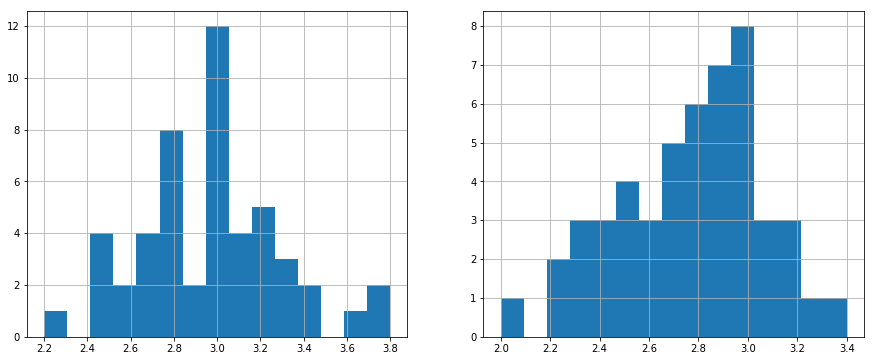

In [77]:
print("Null Hypothesis: The Sepal Width of Iris-virginica is greater than the Sepal Width of Iris-versicolor")
x1 = np.mean(iris[iris["class"] == "Iris-virginica"]['sep_width'].values)
x2 = np.mean(iris[iris["class"] == "Iris-versicolor"]['sep_width'].values)
print("The mean of the Sepal Width of Iris-Virginica:", x1)
print("The mean of the Sepal Width of Iris-versicolor:", x2)
p = two_sided_p_value(x1, x2, iris["sep_width"].values.std())
print("The p-value:", p)
fig, axes = plt.subplots(nrows=1, ncols=2)
iris[iris["class"] == "Iris-virginica"]['sep_width'].hist(ax=axes[0], bins=15)
iris[iris["class"] == "Iris-versicolor"]['sep_width'].hist(ax=axes[1], bins=15)

With our p-value we are able to accept our null-hypothesis.  Our value of ~.637 means that our p-value is not significant.  When this occurs it means we have strong evidence for the null hypothesis, meaning we are able to retain the null hypothesis.  The histograms of the two are given above, and the Iris-virginica is the one which appears to look the most like the normal distribution. I am not sure what this says about my p-value, but maybe if they both did not appear normal, we would be able to reject the null-hypothesis? 

# Among the sepal/petal length/width measurements, we can define six different pairwise comparisons (sepal length vs petal width, sepal length vs sepal width, etc.); show these two parameters together in (six) different scatter plots, where each class is shown by a different color and shape marker.

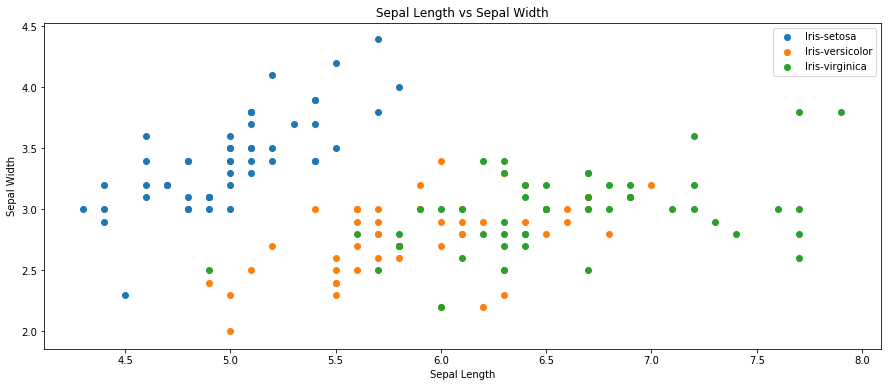

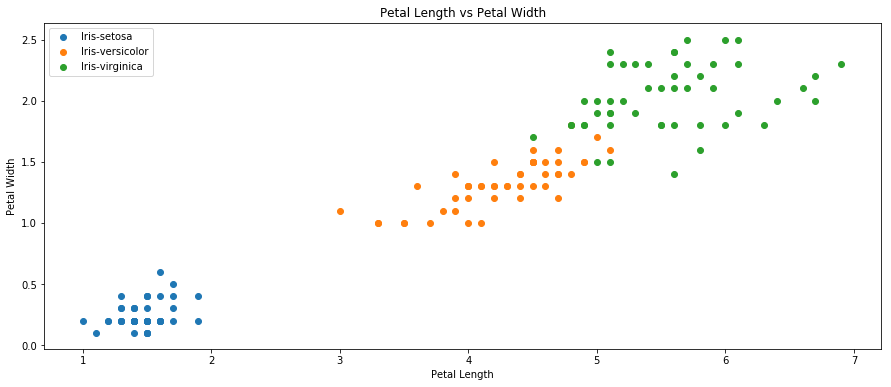

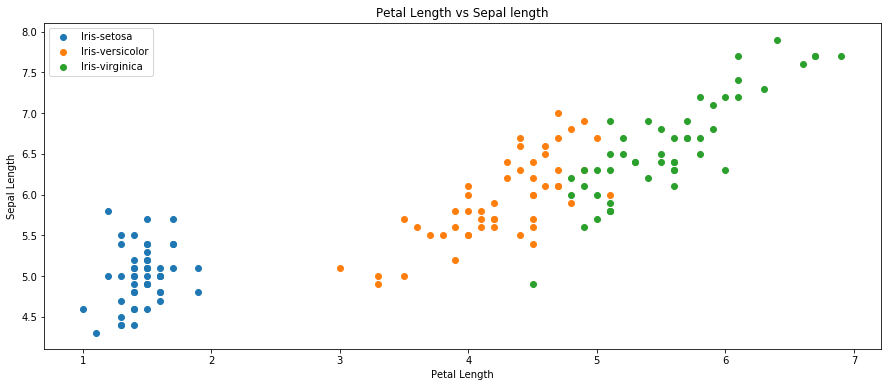

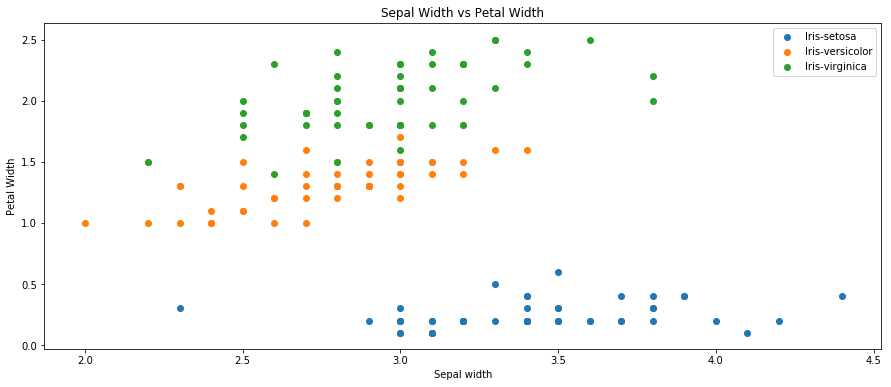

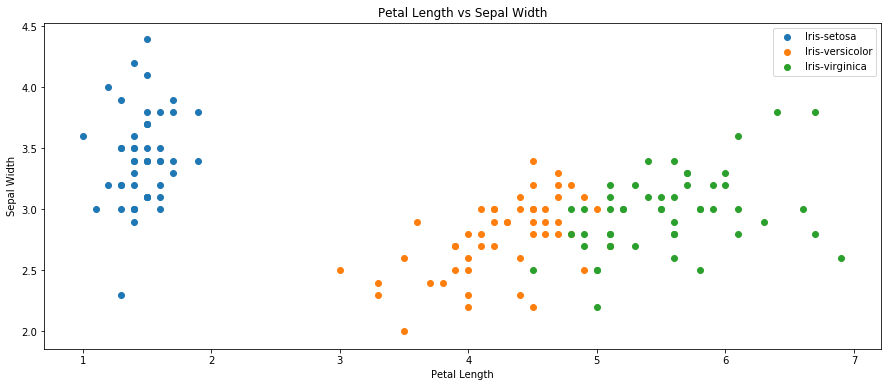

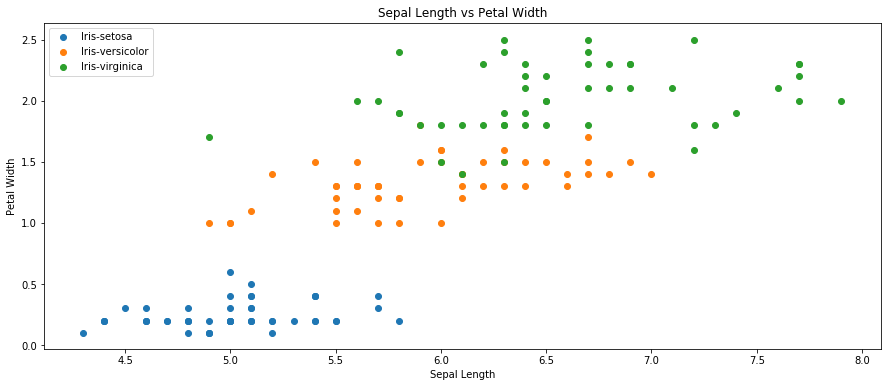

In [8]:
sepal_lens = iris[['sep_length', 'class']]
sepal_wids = iris[['sep_width', 'class']]
petal_lens = iris[['pet_length', 'class']]
petal_wids = iris[['pet_width', 'class']]
f_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for name in f_names:
    s_l = sepal_lens[sepal_lens["class"] == name]['sep_length'].values
    s_w = sepal_wids[sepal_wids["class"] == name]['sep_width'].values
    plt.title("Sepal Length vs Sepal Width")
    plt.scatter(s_l, s_w, marker='o')
    plt.legend(f_names)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
plt.show()
for name in f_names:
    p_l = petal_lens[petal_lens["class"] == name]['pet_length'].values
    p_w = petal_wids[petal_wids["class"] == name]['pet_width'].values
    plt.title("Petal Length vs Petal Width")
    plt.scatter(p_l, p_w, marker='o')
    plt.legend(f_names)
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
plt.show()
for name in f_names:
    p_l = petal_lens[petal_lens["class"] == name]['pet_length'].values
    s_l = sepal_lens[sepal_lens["class"] == name]['sep_length'].values
    plt.title("Petal Length vs Sepal length")
    plt.scatter(p_l, s_l, marker='o')
    plt.legend(f_names)
    plt.xlabel("Petal Length")
    plt.ylabel("Sepal Length")
plt.show()
for name in f_names:
    s_w = sepal_wids[sepal_wids["class"] == name]['sep_width'].values
    p_w = petal_wids[petal_wids["class"] == name]['pet_width'].values
    plt.title("Sepal Width vs Petal Width")
    plt.scatter(s_w, p_w, marker='o')
    plt.legend(f_names)
    plt.xlabel("Sepal width")
    plt.ylabel("Petal Width")
plt.show()
for name in f_names:
    p_l = petal_lens[petal_lens["class"] == name]['pet_length'].values
    s_w = sepal_wids[sepal_wids["class"] == name]['sep_width'].values
    plt.title("Petal Length vs Sepal Width")
    plt.scatter(p_l, s_w, marker='o')
    plt.legend(f_names)
    plt.xlabel("Petal Length")
    plt.ylabel("Sepal Width")
plt.show()
for name in f_names:
    s_l = sepal_lens[sepal_lens["class"] == name]['sep_length'].values
    p_w = petal_wids[petal_wids["class"] == name]['pet_width'].values
    plt.title("Sepal Length vs Petal Width")
    plt.scatter(s_l, p_w, marker='o')
    plt.legend(f_names)
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Width")
plt.show()

## (a) What is the correlation coefficient for each pair of measurements when class is disregarded?

In [9]:
p_l = iris['pet_length'].values
p_w = iris['pet_width'].values
s_l = iris['sep_length'].values
s_w = iris['sep_width'].values

print("Sepal Length vs Sepal Width") 
print(np.cov(s_l, s_w)[0,1]/ (s_l.std()*s_w.std()))
print("Petal Length vs Petal Width")
print(np.cov(p_l, p_w)[0,1]/ (p_l.std()*p_w.std()))
print("Petal Length vs Sepal length")
print(np.cov(p_l, s_l)[0,1]/ (p_l.std()*s_l.std()))
print("Sepal Width vs Petal Width")
print(np.cov(s_w, p_w)[0,1]/ (s_w.std()*p_w.std()))
print("Petal Length vs Sepal Width")
print(np.cov(p_l, s_w)[0,1]/ (p_l.std()*s_w.std()))
print("Sepal Length vs Petal Width")
print(np.cov(s_l, p_w)[0,1]/ (s_l.std()*p_w.std()))
plt.show()

Sepal Length vs Sepal Width
-0.110103271762
Petal Length vs Petal Width
0.969218554078
Petal Length vs Sepal length
0.877604856347
Sepal Width vs Petal Width
-0.358937002967
Petal Length vs Sepal Width
-0.423338352082
Sepal Length vs Petal Width
0.82344325507


## (b) What is the correlation coefficient for each pair of measurements when taking into account only measurements within the same class. I.e. what is the correlation between sepal length and width overall, and what is the correlation coefficient between sepal length and width among the Setosa class, Versicolour class, and Virginica class?

In [28]:
sepal_lens = iris[['sep_length', 'class']]
sepal_wids = iris[['sep_width', 'class']]
petal_lens = iris[['pet_length', 'class']]
petal_wids = iris[['pet_width', 'class']]
s_l = sepal_lens[sepal_lens["class"] == name]['sep_length'].values
s_w = sepal_wids[sepal_wids["class"] == name]['sep_width'].values
p_l = petal_lens[petal_lens["class"] == name]['pet_length'].values
p_w = petal_wids[petal_wids["class"] == name]['pet_width'].values
f_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print("Sepal Length vs Sepal Width") 
for name in f_names:
    print(name + ":")
    s_l = sepal_lens[sepal_lens["class"] == name]['sep_length'].values
    s_w = sepal_wids[sepal_wids["class"] == name]['sep_width'].values
    print(np.cov(s_l, s_w)[0,1]/ (s_l.std()*s_w.std()))
print()
print("Petal Length vs Petal Width")
for name in f_names:
    print(name + ":")
    p_l = petal_lens[petal_lens["class"] == name]['pet_length'].values
    p_w = petal_wids[petal_wids["class"] == name]['pet_width'].values
    print(np.cov(p_l, p_w)[0,1]/ (p_l.std()*p_w.std()))
print()
print("Petal Length vs Sepal length")
for name in f_names:
    print(name + ":")
    s_l = sepal_lens[sepal_lens["class"] == name]['sep_length'].values
    p_l = petal_lens[petal_lens["class"] == name]['pet_length'].values
    print(np.cov(p_l, s_l)[0,1]/ (p_l.std()*s_l.std()))
print()
print("Sepal Width vs Petal Width")
for name in f_names:
    print(name + ":")
    s_w = sepal_wids[sepal_wids["class"] == name]['sep_width'].values
    p_w = petal_wids[petal_wids["class"] == name]['pet_width'].values
    print(np.cov(s_w, p_w)[0,1]/ (s_w.std()*p_w.std()))
print()
print("Petal Length vs Sepal Width")
for name in f_names:
    print(name + ":")
    p_l = petal_lens[petal_lens["class"] == name]['pet_length'].values
    s_w = sepal_wids[sepal_wids["class"] == name]['sep_width'].values
    print(np.cov(p_l, s_w)[0,1]/ (p_l.std()*s_w.std()))
print()
print("Sepal Length vs Petal Width")
for name in f_names:
    print(name + ":")
    s_l = sepal_lens[sepal_lens["class"] == name]['sep_length'].values
    p_w = petal_wids[petal_wids["class"] == name]['pet_width'].values
    print(np.cov(s_l, p_w)[0,1]/ (s_l.std()*p_w.std())) 
    

Sepal Length vs Sepal Width
Iris-setosa:
0.762020789045
Iris-versicolor:
0.536643589064
Iris-virginica:
0.466558996321

Petal Length vs Petal Width
Iris-setosa:
0.312559399141
Iris-versicolor:
0.802722539309
Iris-virginica:
0.32868185296

Petal Length vs Sepal length
Iris-setosa:
0.269259278488
Iris-versicolor:
0.769437712849
Iris-virginica:
0.881861972383

Sepal Width vs Petal Width
Iris-setosa:
0.285686620936
Iris-versicolor:
0.67754971431
Iris-virginica:
0.548702067619

Petal Length vs Sepal Width
Iris-setosa:
0.180300641527
Iris-versicolor:
0.571961318054
Iris-virginica:
0.409229160554

Sepal Length vs Petal Width
Iris-setosa:
0.284787321428
Iris-versicolor:
0.557613338366
Iris-virginica:
0.286844601181
